Alumno: **Ginés González Guirado**

# Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

4.1 You are given the following set of three measurements of the function Y(X).

b) Using the inverse DFT, verify that your answer to (a) is correct.

In [2]:
# Uso una función a la que se le introduce un vector de puntos , a partir del que sacamos la dimension
# y los vectores de base (cosenos y senos), y un parametro m al que si le doy el valor m=1 me devuelve la DFT directa
# y si le doy el valor m=-1 me devuelve la DFT inversa
def ft(v,m):
    D=np.size(v)   # Dimension
    N=D//2         # Armonicos

    M=np.zeros((D,D))
    A=np.zeros((D,D))
    f=0    # la variable muda f, denota el orden de la columna que estamos rellenando
    for i in range(D):
        M[i,f]=1/np.sqrt(D)

    for k in range(1,N+1):
        f=f+1
        for i in range(D):
            M[i,f]=np.cos(2*k*np.pi*i/D)/np.sqrt(D/2)
        f=f+1 
        if f<=(D-1):  #si D es par, una vez llegado al último armónico, se llenará el vector de cosenos pero no el de senos
            for i in range(D):
                M[i,f]=np.sin(2*k*np.pi*i/D)/np.sqrt(D/2)
    #M será la matriz para la DFT inversa
    if(D%2==0):
        for i in range(D):
            M[i,D-1]=M[i,D-1]/np.sqrt(2)
    
    for i in range(D):
        for j in range(D):
            A[i,j]=M[j,i]  # la matriz para la DFT directa será la traspuesta
            
    if m==1:        
        f=np.sqrt(2/D)*np.dot(A,v) #si m=1 el resultado es la transf directa
        return f
    elif m==-1:
        f=np.sqrt(D/2)*np.dot(M,v) #si m=-1 el resultado es la transf inversa
        return f
    else:
        return print('entrada incorrecta: 1 directa, -1 inversa') #si m es distinto de 1 o -1 ponemos un mensaje de error
    

Para comprobar el resultado, como el primer término del vector $f$ es $\frac{a_0}{\sqrt{2}}$ y como $m=2 a_0$, entonces tengo que poner el primer coeficiente como $m \sqrt{2}$.

In [3]:
a = np.array((4/3*np.sqrt(2), 2/3, -4/np.sqrt(3)))
b = ft(a,-1)
b

array([ 2., -1.,  3.])

He obtenido los valores iniciales de $y(x)$.

c) Using MATLAB, plot your 3 data points and the Fourier series determined in (a).

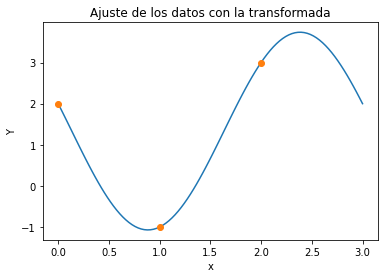

In [4]:
D=np.size(b)
L=D # Longitud de la funcion porque los puntos x están tomados de 1 en 1

x = np.linspace(0,3,100)   # puntos para generar la serie de Fourier
f = 4/3 + 2/3*np.cos(2*np.pi*x/L) - 4/np.sqrt(3)*np.sin(2*np.pi*x/L)   #Serie de Fourier con los coeficientes obtenidos

X = np.arange(0,L,L/D)    # puntos a partir de los que he obtenido los coeficientes

plt.plot(x,f)            # Dibujo Serie de Fourier
plt.plot(X,b,'o')        # Dibujo los puntos a partir de los que he obtenido los coeficientes
plt.xlabel("x")
plt.ylabel("Y")
plt.title("Ajuste de los datos con la transformada")
plt.show()

d) Verify Parsival's theorem for this data vector.

Compruebo la ecuación 3.45 del libro "Fourier Anallysis for beginners".

In [5]:
D=np.size(a)
s=0
for i in range(D):
    s=s+(a[i])**2     # Coeficientes
    
h=0
for i in range(D):
    h=h+(b[i])**2     # Valores de la funcion

    
round(D/2*s,7)==round(h,7)  #lo comprobamos con precisión hasta la séptima cifra defimal

True

4.2 You are given the following set of 9 measurements of the function $Y(X)=e^{-x}$:

a) Determine the Fourier coefficients.

In [6]:
# Hallo los coeficientes de Fourier con la DFT directa
v=np.array((1,0.60653066,0.36787944,0.22313016,0.13533528,0.082085,0.04978707,0.03019738,0.01831564)) 
f=ft(v,1)
f

array([0.39492081, 0.26822633, 0.19532921, 0.16989523, 0.1134277 ,
       0.14505456, 0.05846311, 0.13757269, 0.01817817])

b) Using the inverse DFT, verify that your answer to (a) is correct.

In [7]:
#Compruebo que me dan los mismos valores de y(x) con la DFT inversa
ft(f,-1)

array([1.        , 0.60653066, 0.36787944, 0.22313016, 0.13533528,
       0.082085  , 0.04978707, 0.03019738, 0.01831564])

c) Plot the Fourier coefficients as a frequency spectrum (e.g. see Fig. 4.4 of coursenotes)

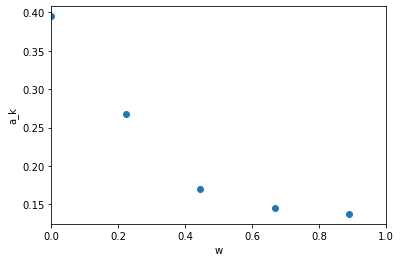

In [8]:
D=np.size(v)
delta=0.5
L=delta*D

if (D%2==0):
    N=D/2
else:
    N=(D-1)/2
    

a=np.zeros(int(N)+1)  #para incluir el a_o   
b=np.zeros(int(N))
a[0]=f[0]
h=0
g=-1
for i in range(1,D):
    if i%2==0:
        g=g+1
        b[g]=f[i]
    else:
        h=h+1
        a[h]=f[i]
    

    
F=np.arange(0,N/L+0.01,1/L)
plt.plot(F,a,'o')
plt.xlim([0,1])
plt.xlabel('w')
plt.ylabel('a_k');

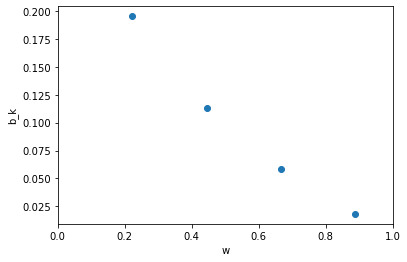

In [9]:
Fp=np.delete(F,0)
plt.plot(Fp,b,'o')
plt.xlim([0,1])
plt.xlabel('w')
plt.ylabel('b_k');

d) Verify Parsival's theorem for this data vector.

In [10]:
#teorema de Parseval
s=0
for i in range(D):
    s=s+(v[i])**2
    
h=0
for i in range(D):
    h=h+(f[i])**2

    
round(D/2*h,7)==round(s,7)

True

4.3 You are given the following set of 10 measurements of the function $Y(X)=2X$.

a) Determine the Fourier coefficients.

In [11]:
v=np.array((0,2,4,6,8,10,12,14,16,18)) 
f=ft(v,1)
f

array([12.72792206, -2.        , -6.15536707, -2.        , -2.75276384,
       -2.        , -1.45308506, -2.        , -0.64983939, -1.41421356])

b) Using the inverse DFT, verify that your answer to (a) is correct.

In [12]:
ft(f,-1)

array([-3.97205465e-15,  2.00000000e+00,  4.00000000e+00,  6.00000000e+00,
        8.00000000e+00,  1.00000000e+01,  1.20000000e+01,  1.40000000e+01,
        1.60000000e+01,  1.80000000e+01])

c) Plot the Fourier coefficients as a frequency spectrum (e.g. see Fig. 4.4 of coursenotes)

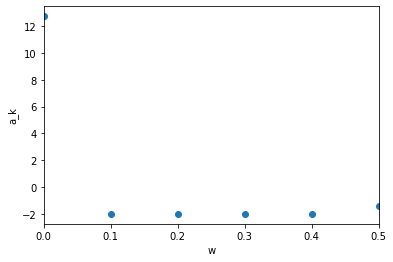

In [13]:
D=np.size(v)
delta=1
L=delta*D

if (D%2==0):
    N=D/2
else:
    N=(D-1)/2
    

a=np.zeros(int(N)+1)  #para incluir el a_o   
b=np.zeros(int(N))
a[0]=f[0]
h=0
g=-1
for i in range(1,D):
    if i%2==0:
        g=g+1
        b[g]=f[i]
    else:
        h=h+1
        a[h]=f[i]

if (D%2==0):
    b=np.delete(b,int(N)-1)

    
F=np.arange(0,N/L+0.01,1/L)
plt.plot(F,a,'o')
plt.xlim([0,0.5])
plt.xlabel('w')
plt.ylabel('a_k');

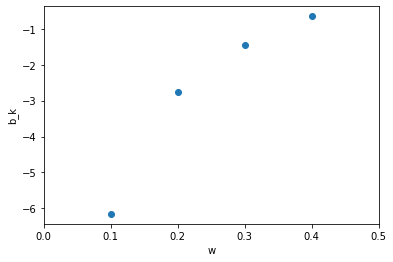

In [14]:
if (D%2==0):
    Fp=np.delete(np.delete(F,np.size(F)-1),0)
else:
    Fp=np.delete(F,0)

plt.plot(Fp,b,'o')
plt.xlim([0,0.5])
plt.xlabel('w')
plt.ylabel('b_k');

d) Verify Parsival's theorem for this data vector.

In [15]:
#Teorema de Parseval
s=0
for i in range(D):
    s=s+(v[i])**2
    
h=0
for i in range(D):
    h=h+(f[i])**2

    
round(D/2*h,7)==round(s,7)

True

4.4 Fourier Series. Use the MATLAB function FourierSeries to interpolate the sampled data vectors in problems 4.1 - 4.3. Use this program to plot a Fourier series that fits the data vectors supplied in problems 4.1 - 4.3. This smooth function should match the sampled data exactly, and provide a reasonable interpolation between sample points.

4.5. Complex exponential basis functions. Write a MATLAB procedure similar to MakeTrig to compute the ortho-normal matrix defined in text eqns. 4.17, 4.20 using complex exponential basis functons.

In [16]:
def mat(D):
    N=D//2

    M=np.zeros((D,D),dtype=complex)
    f=0
    for i in range(D):
        M[i,f]=1

    for k in range(1,N+1):
        f=f+1
        for i in range(D):
            M[i,f]=np.exp(1j*2*k*np.pi*i/D)
        f=f+1 
        if f<=(D-1):
            for i in range(D):
                M[i,f]=np.exp(-1j*2*k*np.pi*i/D)
              
    return M
    

a) Verify your result manually for the case of D=2,3,4,5.

In [17]:
mat(2)

array([[ 1.+0.0000000e+00j,  1.+0.0000000e+00j],
       [ 1.+0.0000000e+00j, -1.+1.2246468e-16j]])

In [18]:
mat(3)

array([[ 1. +0.j       ,  1. +0.j       ,  1. +0.j       ],
       [ 1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j],
       [ 1. +0.j       , -0.5-0.8660254j, -0.5+0.8660254j]])

In [19]:
mat(4)

array([[ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
         1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
         6.1232340e-17-1.0000000e+00j, -1.0000000e+00+1.2246468e-16j],
       [ 1.0000000e+00+0.0000000e+00j, -1.0000000e+00+1.2246468e-16j,
        -1.0000000e+00-1.2246468e-16j,  1.0000000e+00-2.4492936e-16j],
       [ 1.0000000e+00+0.0000000e+00j, -1.8369702e-16-1.0000000e+00j,
        -1.8369702e-16+1.0000000e+00j, -1.0000000e+00+3.6739404e-16j]])

In [20]:
mat(5)

array([[ 1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ],
       [ 1.        +0.j        ,  0.30901699+0.95105652j,
         0.30901699-0.95105652j, -0.80901699+0.58778525j,
        -0.80901699-0.58778525j],
       [ 1.        +0.j        , -0.80901699+0.58778525j,
        -0.80901699-0.58778525j,  0.30901699-0.95105652j,
         0.30901699+0.95105652j],
       [ 1.        +0.j        , -0.80901699-0.58778525j,
        -0.80901699+0.58778525j,  0.30901699+0.95105652j,
         0.30901699-0.95105652j],
       [ 1.        +0.j        ,  0.30901699-0.95105652j,
         0.30901699+0.95105652j, -0.80901699-0.58778525j,
        -0.80901699+0.58778525j]])

b) Verify text eqn. 4.24 specifying the conjugate symmetry expected of the basis vectors.

La simetría del complejo conjugado se puede ver directamente de las matrices obtenidas antes.

In [21]:
#comprobación mediante las matrices complejas, es decir con el conjugado

D=5 #dimensión arbitraria para la que lo queramos comprobar
M=mat(D)
for j in range(1,D-1,2):  #el paso es de 2 porque quiero comprobar la col 1 con la 2, luego la 3 con la 4...
    for i in range(1,D):
        print(M[i,j]==M[i,j+1].conjugate())


True
True
True
True
True
True
True
True


In [22]:
# comprobación de la relación con las matrices reales (ec 4.24)
#primero definimos estas matrices
def rmat(D):
    N=D//2

    M=np.zeros((D,D))
    f=0
    for i in range(D):
        M[i,f]=1

    for k in range(1,N+1):
        f=f+1
        for i in range(D):
            M[i,f]=np.cos(2*k*np.pi*i/D)
        f=f+1 
        if f<=(D-1):
            for i in range(D):
                M[i,f]=np.sin(2*k*np.pi*i/D)
              
    return M


In [23]:
rmat(5)  #Ejemplo de lo que se obtendria

array([[ 1.        ,  1.        ,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.30901699,  0.95105652, -0.80901699,  0.58778525],
       [ 1.        , -0.80901699,  0.58778525,  0.30901699, -0.95105652],
       [ 1.        , -0.80901699, -0.58778525,  0.30901699,  0.95105652],
       [ 1.        ,  0.30901699, -0.95105652, -0.80901699, -0.58778525]])

In [24]:
D=5 #dimensión arbitraria para la que lo queramos comprobar
M=mat(D)
R=rmat(D)
for j in range(1,D-1,2): 
    for i in range(1,D):
        print(M[i,j]==R[i,j]+1j*R[i,j+1])  #Qj=Cj+i*Sj

True
True
True
True
True
True
True
True


4.6 Complex exponential DFT. Write a MATLAB procedure to implement the forward DFT (text eqns. 4.16, 4.21) and inverse DFT (text eqn. 3.38) for any data vector of length D and complex exponential basis functions. Verify that your routine can yield v=IDFT(DFT(v)) for the following data vectors

$$v1 = [3, -2, 6]$$

$$v2 = [-5, 0, 3, 8]$$

In [25]:
def ft2(v,m):
    D=np.size(v)
    N=D//2

    M=np.zeros((D,D),dtype=complex)
    A=np.zeros((D,D),dtype=complex)
    f=0
    for i in range(D):
        M[i,f]=1/np.sqrt(D)

    for k in range(1,N+1):
        f=f+1
        for i in range(D):
            M[i,f]=np.exp(1j*2*k*np.pi*i/D)/np.sqrt(D)
        f=f+1 
        if f<=(D-1):
            for i in range(D):
                M[i,f]=np.exp(-1j*2*k*np.pi*i/D)/np.sqrt(D)
    #M será la matriz para la transf inversa
    
    for i in range(D):
        for j in range(D):
            A[i,j]=M[j,i].conjugate()  # la matriz para la transf directa será la traspuesta
            
            
    if m==1:        
        f=np.sqrt(1/D)*np.dot(A,v) #si m=1 el resultado es la transf directa
        return f
    elif m==-1:
        f=np.sqrt(D)*np.dot(M,v) #si m=-1 el resultado es la transf inversa
        return f
    else:
        return print('entrada incorrecta: 1 directa, -1 inversa') #si m es disntinto de 1 o -1 ponemos un mensaje de error
    

In [26]:
#para v=[3,-2,6]
v=np.array((3,-2,6))
f22 = ft2(ft2(v,1),-1)
f22

array([ 3.+0.j, -2.+0.j,  6.+0.j])

In [27]:
#para v=[-5,0,3,8]
v=np.array((-5,0,3,8))
f22 = ft2(ft2(v,1),-1)
f22

array([-5.-4.4408921e-16j,  0.+4.4408921e-16j,  3.+0.0000000e+00j,
        8.-4.4408921e-16j])

Se cumple v=IDFT(DFT(v)), ya que la parte compleja es nula.

a) Compare the Fourier coefficients produced by this progarm with those produced by the DFT program written for trigonometrical basis functions in problem set 3.

b) Verify text eqn. 4.23 which specifies the relationship between Fourier coefficients for trigonometrical and complex exponential basis functions.

In [28]:
#para v=[3,-2,6]
v=np.array((3,-2,6))
f1=ft(v,1)
f2=ft2(v,1)
print("f1 = ",f1,";  f2 = ", f2)

f1 =  [ 3.29983165  0.66666667 -4.61880215] ;  f2 =  [2.33333333+0.j         0.33333333+2.30940108j 0.33333333-2.30940108j]


In [29]:
print("m = ",f1[0]/np.sqrt(2),"  c0 = ",f2[0])
print("(a1 - i*b1)/2 = ",(f1[1] - 1j*f1[2])/2,"  c1 = ",f2[1])
print("(a1 + i*b1)/2 = ",(f1[1] + 1j*f1[2])/2,"  c-1 = ",f2[2])

m =  2.3333333333333335   c0 =  (2.333333333333334+0j)
(a1 - i*b1)/2 =  (0.3333333333333323+2.309401076758503j)   c1 =  (0.3333333333333323+2.309401076758503j)
(a1 + i*b1)/2 =  (0.3333333333333323-2.309401076758503j)   c-1 =  (0.33333333333333237-2.309401076758503j)


In [30]:
#para v=[-5,0,3,8]
v=np.array((-5,0,3,8))
f1=ft(v,1)
f2=ft2(v,1)
print("f1 = ",f1,";  f2 = ", f2)

f1 =  [ 2.12132034 -4.         -4.         -3.53553391] ;  f2 =  [ 1.5+0.0000000e+00j -2. +2.0000000e+00j -2. -2.0000000e+00j
 -2.5-5.5109106e-16j]


In [31]:
print("m = ",f1[0]/np.sqrt(2),"  c0 = ",f2[0])
print("(a1 - i*b1)/2 = ",(f1[1] - 1j*f1[2])/2,"  c1 = ",f2[1])
print("(a1 + i*b1)/2 = ",(f1[1] + 1j*f1[2])/2,"  c-1 = ",f2[2])
print("(a2 - i*b2)/2 = ",(f1[3])/2,"  c2 = ",f2[3])

m =  1.5   c0 =  (1.5+0j)
(a1 - i*b1)/2 =  (-2.0000000000000004+2j)   c1 =  (-2.0000000000000004+2j)
(a1 + i*b1)/2 =  (-2.0000000000000004-2j)   c-1 =  (-2.0000000000000004-2j)
(a2 - i*b2)/2 =  -1.7677669529663689   c2 =  (-2.5-5.51091059616309e-16j)


Podemos apreciar que se cumple la relación.

Nota: si queremos expresar la salida de forma que $c_o$ esté en el centro, podemos utilizar la función de python np.fft.fftshift, de forma que se expresa el resultado como en 4.21 en lugar de como en 4.17.

In [32]:
np.fft.fftshift(f2)

array([-2. -2.0000000e+00j, -2.5-5.5109106e-16j,  1.5+0.0000000e+00j,
       -2. +2.0000000e+00j])

Es posible que el hecho de que D sea par influya en la relación de los coeficientes para el último armónico, ya que en el último no se cumple la relación exactamente, es cierto que la parte imaginaria es 0 porque no hay un término $b_N$ pero la parte real no es $a_N/2$, sin embargo se cumple para $a_N/ \sqrt{2}$

4.7 Comparison of "slow" and "fast" algorithms for computing Fourier coefficients.

To check the results of the FFT method with the "slow" DFT methods developed in V791, consider the following set of 8 measurements of the function Y(X)=e-x.

a) Determine the Fourier coefficients.

In [33]:
v=np.array((1,0.60653066,0.36787944,0.22313016,0.13533528,0.082085,0.04978707,0.03019738))
f2=ft2(v,1)
f2

array([0.31186812+0.00000000e+00j, 0.13738497-1.03169441e-01j,
       0.13738497+1.03169441e-01j, 0.0897086 -5.44110150e-02j,
       0.0897086 +5.44110150e-02j, 0.07878121-2.36463487e-02j,
       0.07878121+2.36463487e-02j, 0.07638232-4.92775492e-18j])

In [34]:
# La ordeno
np.fft.fftshift(f2)

array([0.0897086 +5.44110150e-02j, 0.07878121-2.36463487e-02j,
       0.07878121+2.36463487e-02j, 0.07638232-4.92775492e-18j,
       0.31186812+0.00000000e+00j, 0.13738497-1.03169441e-01j,
       0.13738497+1.03169441e-01j, 0.0897086 -5.44110150e-02j])

b) Using the inverse DFT, verify that your answer to (a) is correct.

In [35]:
ft2(f2,-1)

array([1.        +0.00000000e+00j, 0.60653066+3.92523115e-17j,
       0.36787944-1.96261557e-17j, 0.22313016+3.92523115e-17j,
       0.13533528-3.92523115e-17j, 0.082085  +5.88784672e-17j,
       0.04978707-5.88784672e-17j, 0.03019738+7.85046229e-17j])

c) Using the MATLAB function fft.m, compare your answers with results from the FFT procedure. Pay attention to the ordering of the results as well as the actual values.

In [36]:
f=np.fft.fftshift(np.fft.fft(v))
f

array([0.61105859+0.j        , 0.63024971+0.18917079j,
       0.71766877+0.43528812j, 1.09907973+0.82535553j,
       2.49494499+0.j        , 1.09907973-0.82535553j,
       0.71766877-0.43528812j, 0.63024971-0.18917079j])

Los valores de la fft implementada en python no se asemejan a los que he obtenido. La transformada compleja que he programado cumple las relaciones 4.28 con los coeficientes de la transformada sin la notación compleja, sin embargo la fft de python no las cumple. Quizás se puede deber a que no usa una base ortonormal como nosotros.

4.8 Complex Fourier Series.